# LED substitution stimuli

In [1]:
import dreye
import numpy as np
from itertools import product

In [2]:
dreye.__version__

'0.0.13dev2'

## Get dummy LED measurements and a photoreceptor model

In [3]:
measured_spectra = dreye.get_led_spectra_container()

## Spectra of LEDs used for fitting

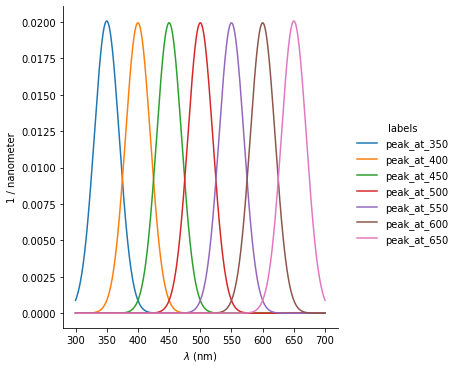

In [4]:
measured_spectra.normalized_spectra.plot()

In [5]:
# intensity range of LEDs
measured_spectra.intensity_bounds

(array([0., 0., 0., 0., 0., 0., 0.]),
 array([100., 100., 100., 100., 100., 100., 100.]))

## Trichromatic linear photoreceptor model

In [6]:
photoreceptor_model = dreye.get_photoreceptor_model()

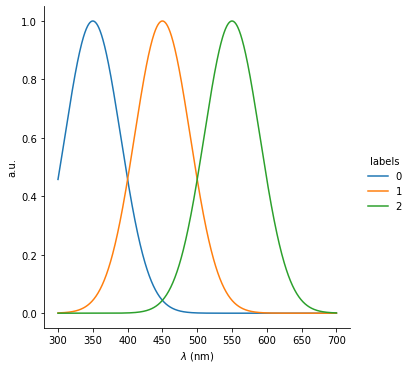

In [7]:
photoreceptor_model.sensitivity.plot()

## Setup Led Substitution stimulus model

In [8]:
stimuli_model = dreye.LedSubstitution(
    photoreceptor_model=photoreceptor_model, 
    measured_spectra=measured_spectra, 
    
    unidirectional=True,  
    # only allow increases or decreases, when 
    # simulating an increase or decrease of an LED respectively
    
    keep_proportions=False, 
    # whether to keep the porportions of the LEDs across intensities
    
    bg_ints=np.ones(7), 
    # intensity of LEDs for the background if wanted, default to 0 if rtype is absolute or diff else it is 1
    
    rtype='absolute', 
    fit_weights=np.array([1, 2, 2])
)

### Construct X

In [9]:
led_idcs = np.arange(7)  # indices of different LEDs
led_intensities = np.arange(1, 11, 1)[::-1] + 1 # desired intensity of 
X = np.array(list(product(led_idcs, led_intensities)))

In [10]:
stimuli_model.fit(X)

LedSubstitution(bg_ints=array([1., 1., 1., 1., 1., 1., 1.]),
                fit_weights=array([1, 2, 2]),
                measured_spectra=MeasuredSpectraContainer([[0.0 0.009798814440291572 0.019597628880583143 ... 0.068591701082041  0.07839051552233257 0.08818932996262414] [0.0 0.010427524565018598 0.020855049130037197 ... 0.07299267195513018  0.08342019652014879 0.09384772108516738] [0.0 0.011089640706...0.010427524565018598 0.020855049130037197 ... 0.07299267195513018  0.08342019652014879 0.09384772108516738] [0.0 0.00979881444029157 0.01959762888058314 ... 0.06859170108204099  0.07839051552233256 0.08818932996262414]] microspectral_E_Q),
                photoreceptor_model=<dreye.core.photoreceptor.LinearPhotoreceptor object at 0x7ffd2837bd30>,
                rtype='absolute', unidirectional=True)

In [11]:
stimuli_model.sample_scores()

array([0.31152129, 0.31152168, 0.31152028, 0.31152003, 0.31151966,
       0.31152207, 0.31152198, 0.31151471, 0.31150514, 0.31150642,
       0.99526615, 0.99526615, 0.99526615, 0.99526616, 0.99526615,
       0.99526616, 0.99526615, 0.99526616, 0.99526615, 0.99526616,
       0.19644961, 0.19650858, 0.19646598, 0.19642992, 0.1964722 ,
       0.19648561, 0.19641845, 0.19644968, 0.1964739 , 0.19649972,
       0.98619633, 0.98619633, 0.98619634, 0.98619635, 0.98619634,
       0.98619633, 0.98619634, 0.98619634, 0.98619633, 0.98619632,
       0.99999933, 0.99999933, 0.99999933, 0.99999933, 0.99999933,
       0.99999933, 0.99999933, 0.99999933, 0.99999933, 0.99999933,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99994259, 0.99994259, 0.99994259, 0.99994259, 0.99994259,
       0.99994259, 0.99994259, 0.99994259, 0.99994247, 0.99994258])

In [12]:
df = stimuli_model.fitted_intensities_df_.copy()
df.columns.name = 'led_names'
df = df.stack()
df.name = 'led_intensities'
df = df.reset_index()
df.head()

,led,simulate,rel_led_int,rtype,fitted_0,fitted_1,fitted_2,led_names,led_intensities
0,peak_at_350,True,11.0,absolute,3.333384,2.693234,1.011409,peak_at_350,1.00000
1,peak_at_350,True,11.0,absolute,3.333384,2.693234,1.011409,peak_at_400,8.08234
2,peak_at_350,True,11.0,absolute,3.333384,2.693234,1.011409,peak_at_450,1.00000
3,peak_at_350,True,11.0,absolute,3.333384,2.693234,1.011409,peak_at_500,1.00000
4,peak_at_350,True,11.0,absolute,3.333384,2.693234,1.011409,peak_at_550,1.00000


In [13]:
import seaborn as sns

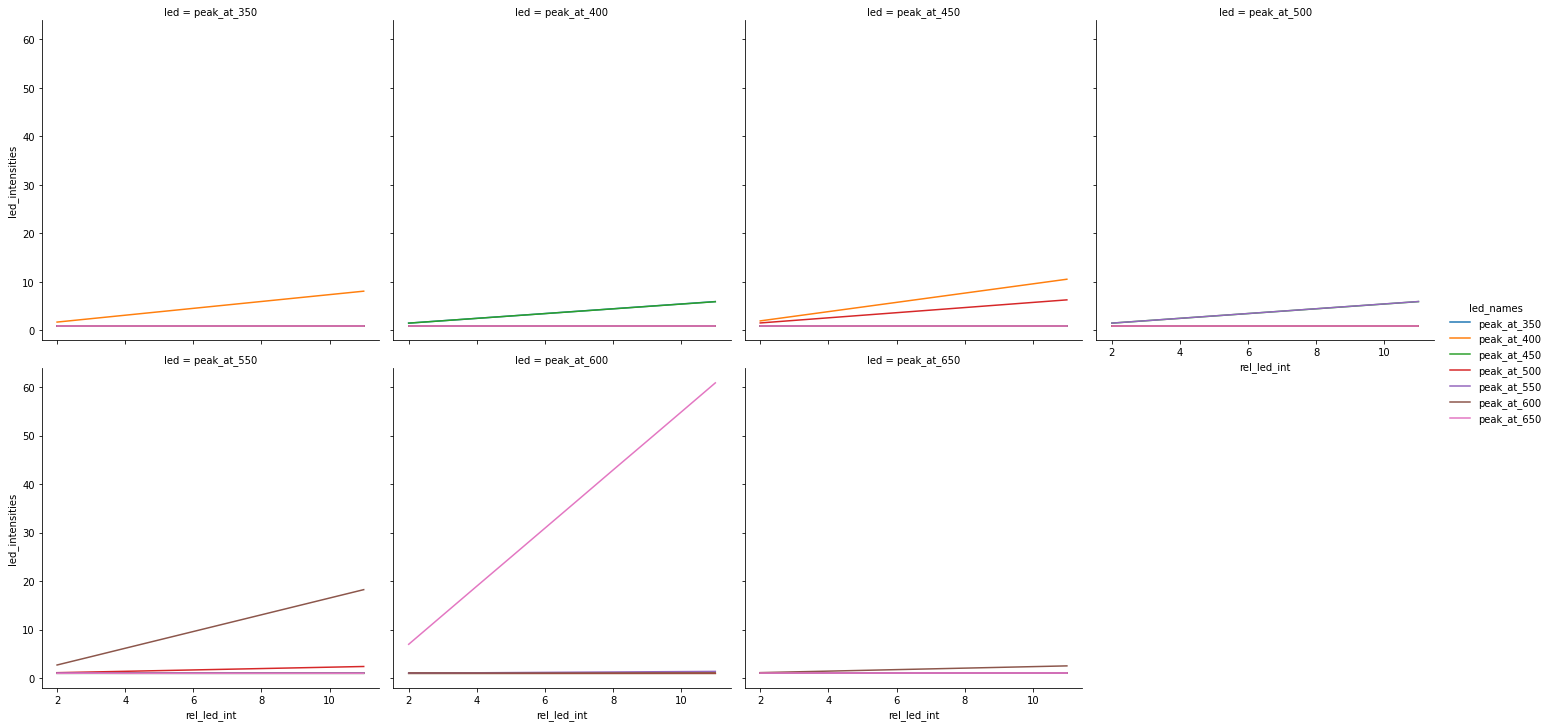

In [14]:
sns.relplot(
    data=df[df['simulate']],
    x='rel_led_int', 
    y='led_intensities', 
    hue='led_names', 
    col='led', 
    col_wrap=4, 
    ci=None,
    kind='line'
)